In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/monkey"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 2 images in '/content/drive/MyDrive/monkey'.
There are 1 directories and 0 images in '/content/drive/MyDrive/monkey/training'.
There are 10 directories and 0 images in '/content/drive/MyDrive/monkey/training/training'.
There are 0 directories and 106 images in '/content/drive/MyDrive/monkey/training/training/n6'.
There are 0 directories and 106 images in '/content/drive/MyDrive/monkey/training/training/n8'.
There are 0 directories and 114 images in '/content/drive/MyDrive/monkey/training/training/n7'.
There are 0 directories and 105 images in '/content/drive/MyDrive/monkey/training/training/n4'.
There are 0 directories and 111 images in '/content/drive/MyDrive/monkey/training/training/n1'.
There are 0 directories and 122 images in '/content/drive/MyDrive/monkey/training/training/n3'.
There are 0 directories and 110 images in '/content/drive/MyDrive/monkey/training/training/n2'.
There are 0 directories and 105 images in '/content/drive/MyDrive/monkey/training

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/monkey/training/training") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['n0' 'n1' 'n2' 'n3' 'n4' 'n5' 'n6' 'n7' 'n8' 'n9']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (450, 599, 3)


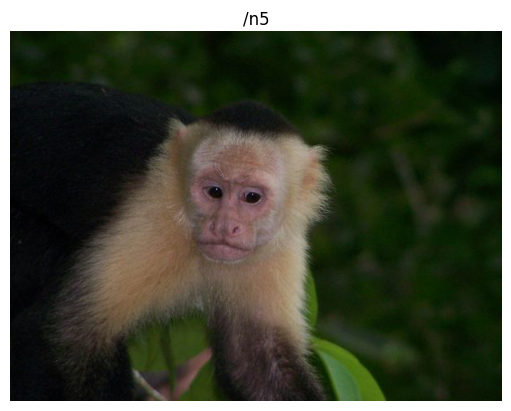

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/drive/MyDrive/monkey/training/training",
                        target_class="/n5")

In [ ]:
img.shape

(450, 599, 3)

In [ ]:

# Get all the pixel values between 0 & 1
img/255

array([[[0.0627451 , 0.08627451, 0.03921569],
        [0.0627451 , 0.08627451, 0.03921569],
        [0.05882353, 0.09019608, 0.03137255],
        ...,
        [0.01176471, 0.03529412, 0.01960784],
        [0.01568627, 0.03921569, 0.02352941],
        [0.00784314, 0.03137255, 0.01568627]],

       [[0.06666667, 0.07843137, 0.03529412],
        [0.05882353, 0.08235294, 0.02745098],
        [0.0627451 , 0.08627451, 0.03137255],
        ...,
        [0.01176471, 0.03529412, 0.01960784],
        [0.01568627, 0.03921569, 0.02352941],
        [0.00784314, 0.03137255, 0.01568627]],

       [[0.06666667, 0.08235294, 0.02745098],
        [0.06666667, 0.08235294, 0.02745098],
        [0.05882353, 0.08235294, 0.02745098],
        ...,
        [0.01176471, 0.03921569, 0.01176471],
        [0.01176471, 0.03921569, 0.01176471],
        [0.00784314, 0.03529412, 0.00784314]],

       ...,

       [[0.03137255, 0.03921569, 0.02745098],
        [0.02352941, 0.03137255, 0.01960784],
        [0.02745098, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/content/drive/MyDrive/monkey/training/training"
test_dir = "/content/drive/MyDrive/monkey/validation/validation"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                                # type of problem we're working on
                                               class_mode='categorical',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
Epoch 1/5
35/35 [==============================] - 294s 8s/step - loss: 2.2479 - accuracy: 0.1612 - val_loss: 2.1538 - val_accuracy: 0.2279
Epoch 2/5
35/35 [==============================] - 41s 1s/step - loss: 1.7409 - accuracy: 0.4199 - val_loss: 1.6150 - val_accuracy: 0.4522
Epoch 3/5
35/35 [==============================] - 43s 1s/step - loss: 1.1243 - accuracy: 0.6457 - val_loss: 1.4031 - val_accuracy: 0.5404
Epoch 4/5
35/35 [==============================] - 41s 1s/step - loss: 0.7274 - accuracy: 0.7760 - val_loss: 1.2259 - val_accuracy: 0.5699
Epoch 5/5
35/35 [==============================] - 42s 1s/step - loss: 0.4537 - accuracy: 0.8634 - val_loss: 1.7757 - val_accuracy: 0.4669


In [ ]:

# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=8,

                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=8,

                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=8
                                             )

Augmented training images:
Found 1098 images belonging to 10 classes.
Non-augmented training images:
Found 1098 images belonging to 10 classes.
Unchanged test images:
Found 272 images belonging to 10 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(64, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(128, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(256, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=35,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/35
138/138 [==============================] - 56s 399ms/step - loss: 2.4277 - accuracy: 0.1148 - val_loss: 2.3271 - val_accuracy: 0.1029
Epoch 2/35
138/138 [==============================] - 55s 397ms/step - loss: 2.3178 - accuracy: 0.1148 - val_loss: 2.2929 - val_accuracy: 0.1544
Epoch 3/35
138/138 [==============================] - 56s 408ms/step - loss: 2.3083 - accuracy: 0.1193 - val_loss: 2.3024 - val_accuracy: 0.1103
Epoch 4/35
138/138 [==============================] - 54s 396ms/step - loss: 2.3254 - accuracy: 0.1284 - val_loss: 2.3024 - val_accuracy: 0.1103
Epoch 5/35
138/138 [==============================] - 55s 398ms/step - loss: 2.3037 - accuracy: 0.1111 - val_loss: 2.3022 - val_accuracy: 0.1103
Epoch 6/35
138/138 [==============================] - 56s 408ms/step - loss: 2.3503 - accuracy: 0.1175 - val_loss: 2.3007 - val_accuracy: 0.1140
Epoch 7/35
138/138 [==============================] - 55s 399ms/step - loss: 2.3252 - accuracy: 0.1075 - val_loss: 2.3022 - val_ac

KeyboardInterrupt: ignored

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=8,

                                                                            shuffle=True) # Shuffle data (default)


Found 1098 images belonging to 10 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_7.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
138/138 [==============================] - ETA: 0s - loss: 2.2309 - accuracy: 0.1867

ValueError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=16,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=16,
                                              class_mode='categorical')


Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
69/69 [==============================] - 48s 651ms/step - loss: 2.1359 - accuracy: 0.2295 - val_loss: 1.8133 - val_accuracy: 0.3824
Epoch 2/5
69/69 [==============================] - 42s 608ms/step - loss: 1.3336 - accuracy: 0.5829 - val_loss: 1.4122 - val_accuracy: 0.5184
Epoch 3/5
69/69 [==============================] - 46s 675ms/step - loss: 0.5282 - accuracy: 0.8288 - val_loss: 1.6548 - val_accuracy: 0.5074
Epoch 4/5
69/69 [==============================] - 41s 589ms/step - loss: 0.1394 - accuracy: 0.9645 - val_loss: 2.0165 - val_accuracy: 0.5588
Epoch 5/5
69/69 [==============================] - 43s 621ms/step - loss: 0.0269 - accuracy: 0.9954 - val_loss: 2.7695 - val_accuracy: 0.5074


In [ ]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers



In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 16

In [ ]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

In [ ]:
train_data.num_classes

10

In [ ]:

# Create model
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
resnet_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resnet_history = resnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")])

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20230708-184302
Epoch 1/5
69/69 [==============================] - 53s 661ms/step - loss: 0.7798 - accuracy: 0.7650 - val_loss: 0.2185 - val_accuracy: 0.9522
Epoch 2/5
69/69 [==============================] - 44s 640ms/step - loss: 0.1148 - accuracy: 0.9854 - val_loss: 0.1673 - val_accuracy: 0.9596
Epoch 3/5
69/69 [==============================] - 43s 629ms/step - loss: 0.0630 - accuracy: 0.9945 - val_loss: 0.1317 - val_accuracy: 0.9596
Epoch 4/5
69/69 [==============================] - 46s 670ms/step - loss: 0.0384 - accuracy: 0.9954 - val_loss: 0.1052 - val_accuracy: 0.9632
Epoch 5/5
69/69 [==============================] - 42s 610ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.0952 - val_accuracy: 0.9632


In [ ]:

# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

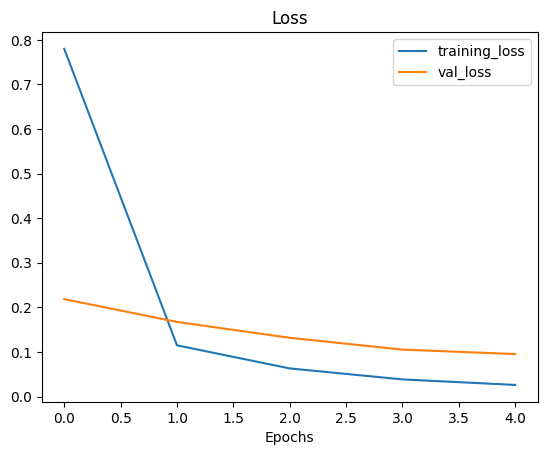

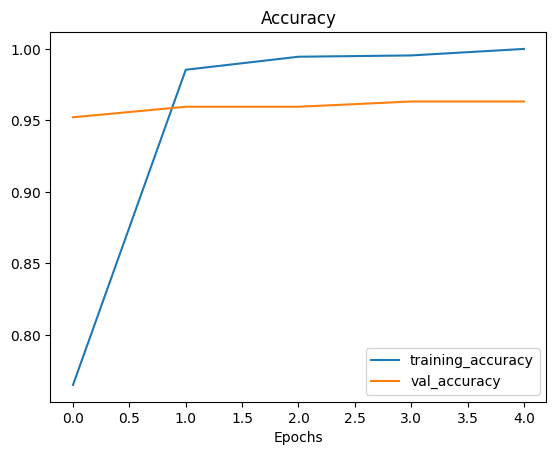

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:

# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_data.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model
efficientnet_history = efficientnet_model.fit(train_data, # only use 10% of training data
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20230708-185114
Epoch 1/5
69/69 [==============================] - 55s 620ms/step - loss: 0.9718 - accuracy: 0.8179 - val_loss: 0.3024 - val_accuracy: 0.9890
Epoch 2/5
69/69 [==============================] - 43s 633ms/step - loss: 0.1812 - accuracy: 0.9891 - val_loss: 0.1415 - val_accuracy: 0.9926
Epoch 3/5
69/69 [==============================] - 43s 625ms/step - loss: 0.0960 - accuracy: 0.9936 - val_loss: 0.0951 - val_accuracy: 1.0000
Epoch 4/5
69/69 [==============================] - 42s 611ms/step - loss: 0.0633 - accuracy: 0.9964 - val_loss: 0.0722 - val_accuracy: 1.0000
Epoch 5/5
69/69 [==============================] - 42s 607ms/step - loss: 0.0454 - accuracy: 0.9982 - val_loss: 0.0585 - val_accuracy: 1.0000


In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size= 16)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical")

Found 1097 files belonging to 10 classes.
Found 272 files belonging to 10 classes.


In [ ]:
train_data.class_names

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

In [ ]:
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[8.02293472e+01 8.31802368e+01 9.04257736e+01]
   [3.11732349e+01 3.14678764e+01 2.39098434e+01]
   [8.91051254e+01 8.58595886e+01 7.15961914e+01]
   ...
   [6.95595551e+01 1.19575996e+02 1.41908142e+02]
   [6.63273621e+01 1.14080040e+02 1.21330574e+02]
   [6.53862686e+01 1.09386269e+02 1.18386269e+02]]

  [[9.15847931e+01 9.45356903e+01 1.01781227e+02]
   [4.02098312e+01 4.05044746e+01 3.29464378e+01]
   [3.32090530e+01 2.99635162e+01 1.57001238e+01]
   ...
   [6.61629715e+01 1.14310371e+02 1.33890961e+02]
   [6.29651833e+01 1.10453171e+02 1.15477196e+02]
   [6.18723907e+01 1.08872391e+02 1.16970535e+02]]

  [[1.58965607e+02 1.61916489e+02 1.69162033e+02]
   [6.49011536e+01 6.51958008e+01 5.76377602e+01]
   [2.40396729e+01 2.07941360e+01 8.54489326e+00]
   ...
   [6.32580910e+01 1.09762207e+02 1.23454834e+02]
   [6.25691147e+01 1.07901703e+02 1.09903938e+02]
   [6.32835159e+01 1.10234444e+02 1.19749123e+02]]

  ...

  [[4.78167763e+01 4.64841957e+01 2.48844757e+01]
   [7

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3), name= "input_layer")

x = base_model(inputs)
print("base model shape:", x.shape)

x = tf.keras.layers.GlobalAveragePooling2D(name="GL_AV_PL_Layer")(x)
print("Avg pooled model shape:", x.shape)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])




base model shape: (None, 7, 7, 1280)
Avg pooled model shape: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230708-194641


Epoch 1/5
69/69 [==============================] - 36s 388ms/step - loss: 0.9415 - accuracy: 0.8396 - val_loss: 0.2561 - val_accuracy: 0.9844
Epoch 2/5
69/69 [==============================] - 21s 277ms/step - loss: 0.1790 - accuracy: 0.9854 - val_loss: 0.1330 - val_accuracy: 1.0000
Epoch 3/5
69/69 [==============================] - 22s 287ms/step - loss: 0.0986 - accuracy: 0.9954 - val_loss: 0.0938 - val_accuracy: 1.0000
Epoch 4/5
69/69 [==============================] - 23s 295ms/step - loss: 0.0677 - accuracy: 0.9973 - val_loss: 0.0609 - val_accuracy: 1.0000
Epoch 5/5
69/69 [==============================] - 23s 294ms/step - loss: 0.0476 - accuracy: 0.9973 - val_loss: 0.0664 - val_accuracy: 0.9688


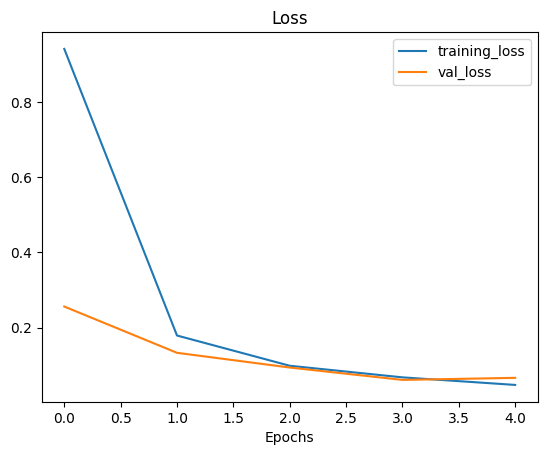

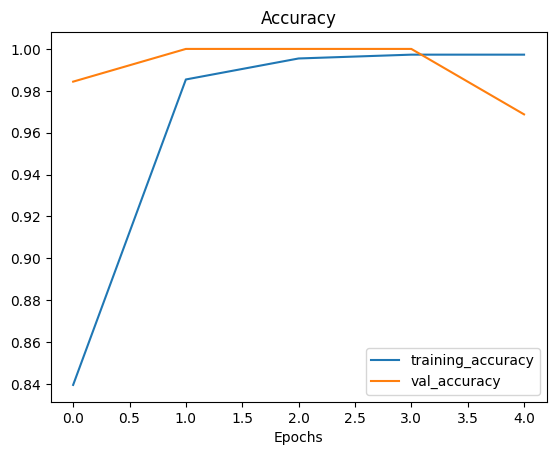

In [ ]:
plot_loss_curves(history_10_percent)

In [ ]:
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [ ]:
tf.reduce_mean(input_tensor, axis=[1, 3])

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.28985116, -0.7840436 ,  0.22333677, -0.27030972]],
      dtype=float32)>